<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/labs/09%20-%20Regression%201/Exercise/Exercise_09_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: Supervised Learning, Linear Regression

This exercise is an application of what you learned in the walkthrough. The following cell gather the different modules you need for this exercise (take a look at the sklearn library).

Some exercises consist of filling a part of the code without writing the whole code. Replace the `"YOUR CODE HERE"` by your own code.

In [1]:
# Useful starting lines
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

# Sklearn import
from sklearn.preprocessing import MinMaxScaler # Normalization
from sklearn.linear_model import LinearRegression # Regression linear model
from sklearn.model_selection import train_test_split # Splitting the data set
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Metrics for errors
from sklearn.model_selection import KFold # Cross validation



## 1. Load the data
We are going to use data about a bike sharing plateform. The task is to figure out how different factors influence the number of bike borrowed.
     
Load the pandas dataset from the given URL. Then display the first 5 rows.

In [2]:
url = 'https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/bike_sharing_daily.csv'
# Load the data
bike = pd.read_csv(url)
display(bike.head())

# Observations and columns (dimensions)
print("Number of observations", bike.shape[0])
print("Number of dimensions", bike.shape[1])


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Number of observations 731
Number of dimensions 16


In what follows we will try a simple linear regression using only one feature (univariate regression), that is, we want to predict the `cnt` using only the `temp` feature.

To get a first sense of the relationship between the different variables, display the correlation table.

In [6]:
# Display the correlation table
bike.corr(numeric_only=True)


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


## 2. Using Sklearn
When using sklearn we don't need to add a column of ones to the data in order to have the constant parameter. Sklearn takes care of it, you should just pass the `fit_intercept` argument to be True (which is also the default value for this argument).

1. From the dataset, save the feature ``temp`` and  `cnt` in two different variables X and y respectively, in a dataframe pandas format and not as a series (`X[['sth']]` instead of `X['sth']`).

2. Split the data into a train and a test set. The test set size should be 20% of the original data. Additionally, set the `random_state` to 0 and `shuffle` to `True`.

3. Create a new Linear model from the `LinearRegression` module of sklearn. Make sure it includes an intercept. Fit the model with the corresponding data.  

4. Print the values of the slope and the constant.  


5. Compute the r2, MAE, and MSE.

6. Plot the regression.

In [7]:
# 1) Use the original dataframe
X = bike[["temp"]]
y = bike[["cnt"]]

In [8]:
# 2) Do the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

We don't normalize the data here, but this is how it would be done:
```
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
```

In [9]:
# 3) Create the linear model
LR = LinearRegression(fit_intercept=True)

# Fit the model using X and y
LR.fit(X_train, y_train)

LinearRegression()

In [10]:
# 4) Model output
print("Slope: %.4f" % LR.coef_.flatten()[0])
print("Constant (intercept): %.4f" % LR.intercept_[0])

Slope: 6578.3915
Constant (intercept): 1262.2879


In [11]:
# 5) First you have to make the predictions for the test set
prediction = LR.predict(X_test)

# r2, MAE, and MSE
print('R^2: %.2f' % r2_score(y_test, prediction))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, prediction))
print('Mean squared error: %.2f' % mean_squared_error(y_test, prediction))

R^2: 0.35
Mean absolute error: 1422.07
Mean squared error: 2748206.98


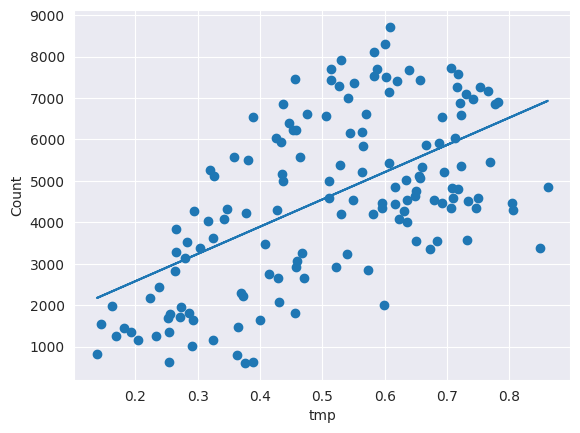

In [14]:
# 6) Plot of the regression
plt.scatter(X_test, y_test)
# When using the MinMaxScaler, replace X_test with X_test[0] below
plt.plot(X_test, prediction)
plt.xlabel('tmp')
plt.ylabel('Count')
plt.show()

When you use this single-variate model, you can simply switch the features (`temp`, `season`, `weekday`, `workingday`, `windspeed`,`holiday`, `mnth`) to see which predicts the target variable (`cnt`) the best. Which feature predicts the count best?

**Hint:** Simply change the target variable and re-run the cells above. Then compare the evaluation metrics (r2, MAE and MSE).

In [ ]:
Evaluation = pd.DataFrame(index=['Slope', 'Constant', 'r2', 'MAE', 'MSE'])
for feature in ['temp','season', 'weekday', 'workingday','windspeed','holiday','mnth']:
  X = bike[[feature]]
  y = bike[["cnt"]]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
  scaler = MinMaxScaler()
  # scaler.fit(X_train)
  # X_train = pd.DataFrame(scaler.transform(X_train))
  # X_test = pd.DataFrame(scaler.transform(X_test))
  LR = LinearRegression(fit_intercept=True)
  LR.fit(X_train, y_train)
  prediction = LR.predict(X_test)
  Evaluation[feature] = [LR.coef_.flatten()[0], LR.intercept_[0], r2_score(y_test, prediction), mean_absolute_error(y_test, prediction), mean_squared_error(y_test, prediction)]
Evaluation.round(decimals = 2)

,temp,season,weekday,workingday,windspeed,holiday,mnth
Slope,6578.39,668.73,52.96,172.85,-6116.85,-576.84,153.80
Constant,1262.29,2816.58,4336.31,4375.72,5654.39,4511.09,3488.72
r2,0.35,0.21,0.01,0.01,0.04,0.01,0.08
MAE,1422.07,1493.85,1696.05,1693.14,1672.75,1686.59,1600.24
MSE,2748206.98,3376645.28,4217422.16,4218102.50,4100441.99,4209842.04,3919070.04


The model predicting `cnt` with `temp` has the highest r2, lowest MAE, and lowest MSE. It is followed by `season`.

## 3. Using more features for prediction

Let's try to use more features to predict the count. For example we can observe the effect of temperature and weekday in the same time.

1. From the dataset, save the features ``temp`` and `weekday` in to X  and the target `cnt` into y, in a dataframe pandas format (`X[['sth']]` instead of `X['sth']`).

2. Split the data into a train and a test set. The test set size should be 20% of the original data. Additionally, set the `random_state` to 0 and `shuffle` to `True`.

3. Create a new Linear model from the `LinearRegression` module of sklearn. Fit the model with the corresponding data.

4. Print the parameters of the slope and the constant (intercept).

5. Compute the r2 (`r2_score`), MAE (`mean_absolute_error`), and MSE (`mean_squared_error`).



In [21]:
# 1) Use the original dataframe
X = bike[["temp", "weekday"]]
y = bike[["cnt"]]

In [22]:
# 2) Do the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

We don't normalize the data here, but this is how it would be done:
```
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
```

In [23]:
# 3) Create the linear model
LR = LinearRegression(fit_intercept=True)

# Fit the model using X and y
LR.fit(X_train, y_train)

LinearRegression()

In [24]:
# 4) Parameters and Intercept
print("Parameters: ", LR.coef_)
print("Intercept: ", LR.intercept_)

Parameters:  [[6594.03892321   66.31739804]]
Intercept:  [1055.53214423]


In [25]:
# 5) Predict the count
print("y_pred: %.4f" % LR.predict(X_test.iloc[[12]]).flatten()[0],  "y_true: ", y_test.iloc[12].cnt)

y_pred: 3789.6440 y_true:  1461


__Important:__ The next exercise answers the quiz question 2.

In [26]:
# 6) First you have to make the predictions for the test set
prediction = LR.predict(X_test)

# r2, MAE, and MSE
print('R^2: %.2f' % r2_score(y_test, prediction))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, prediction))
print('Mean squared error: %.2f' % mean_squared_error(y_test, prediction))

R^2: 0.36
Mean absolute error: 1408.22
Mean squared error: 2731859.17


In [27]:
r2_score(y_test, prediction)

0.35768459114628726

Did the model metrics (r2, MAE, MSE) improve significantly when `weekday` was added to the features to predict `cnt`? Did the model become "better"?

In [ ]:
# Compute by how much each of the metrics changed in comparaison to the single-variate model
print('Variation in r2:  ', round(r2_score(y_test, prediction) - 0.35, 2))
print('Variation in MAE:', round(mean_absolute_error(y_test, prediction) - 1422.07, 2))
print('Variation in MSE:', round(mean_squared_error(y_test, prediction) - 2748206.98, 2))

Variation in r2:   0.01
Variation in MAE: -13.85
Variation in MSE: -16347.81


Every evaluation metric improved (increase in r2, decrease in MAE and MSE), therefore we can concluded that the model became "better".

## 4. Using all features
Redo steps 1-6 with 'temp','season', 'weekday', 'workingday','windspeed','holiday' and 'mnth' as features predicting `cnt`.

In [ ]:
# Find the features and the target
X = bike[['temp','season', 'weekday', 'workingday','windspeed','holiday','mnth']]
y = bike[["cnt"]]
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
# The scaling would take place here
# Create and fit the linear regression model
LR = LinearRegression(fit_intercept=True)
LR.fit(X_train, y_train)
# Display the various parameters
print("The Model Parameters:", "\nw_0 (constant):  ", round(LR.intercept_[0], ndigits=3), "\nw_1 (temp):        ", round(LR.coef_[0][0], ndigits=3), "\nw_2 (season):     ", round(LR.coef_[0][1], ndigits=3), "\nw_3 (weekday):", round(LR.coef_[0][2], ndigits=3), "\nw_4 (workingday):", round(LR.coef_[0][3], ndigits=3), "\nw_5 (windspeed):", round(LR.coef_[0][4], ndigits=3), "\nw_6 (holiday):", round(LR.coef_[0][5], ndigits=3), "\nw_7 (mnth):", round(LR.coef_[0][6], ndigits=3))
# Make a prediction for the 12th obsercation
print('\nPrediction for the 12th Observation:', "\ny_pred: %.4f" % LR.predict(X_test.iloc[[12]]).flatten()[0],  "y_true: ", y_test.iloc[12].cnt)
# Compute the model metrics
prediction = LR.predict(X_test)
print('\nMetrics to Judge the Model:', '\nR^2: %.2f' % r2_score(y_test, prediction), '\nMean absolute error: %.2f' % mean_absolute_error(y_test, prediction), '\nMean squared error: %.2f' % mean_squared_error(y_test, prediction))

The Model Parameters: 
w_0 (constant):   1209.799 
w_1 (temp):         5724.736 
w_2 (season):      423.748 
w_3 (weekday): 64.06 
w_4 (workingday): 63.058 
w_5 (windspeed): -3085.726 
w_6 (holiday): -418.412 
w_7 (mnth): -35.362

Prediction for the 12th Observation: 
y_pred: 2962.6520 y_true:  1461

Metrics to Judge the Model: 
R^2: 0.42 
Mean absolute error: 1346.42 
Mean squared error: 2483469.77
